<a href="https://colab.research.google.com/github/photostachio/Unit2_Build_Startups/blob/master/Startups_Build_Week_Unit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
pd.set_option('display.max_column',None)
df = pd.read_csv('/content/drive/My Drive/investments_VC.csv',encoding = 'unicode_escape')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df['name'].value_counts().sum()

21840

In [3]:
df['status'].unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [0]:
df = df.dropna()

In [5]:
df['status'].unique()

array(['acquired', 'operating', 'closed'], dtype=object)

In [6]:
#First we will transform 'status' into a 2/1/0 format for Acquired, operating and closed
df['status'] = df['status'].map({'acquired': 1, 'operating': 1, 'closed': 0})
df['status']

0        1
8        1
12       1
13       1
16       1
        ..
49425    1
49426    1
49427    1
49429    1
49437    1
Name: status, Length: 21840, dtype: int64

In [7]:
df['status'].value_counts(normalize=True)

1    0.945513
0    0.054487
Name: status, dtype: float64

In [8]:
df['status'].mean()

0.9455128205128205

In [0]:
df['initial_funding'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['private_equity'] + df['angel'] + df['product_crowdfunding']

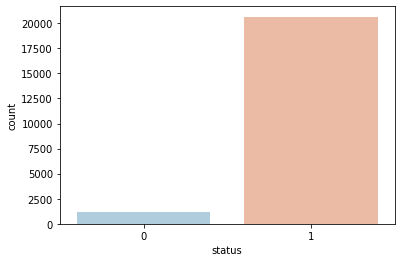

In [10]:
sns.countplot(x='status', data=df,palette='RdBu_r')

In [11]:
df['status'].value_counts()

1    20650
0     1190
Name: status, dtype: int64

In [12]:
df.describe()


,status,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,initial_funding
count,21840.000000,21840.000000,21840.000000,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04
mean,0.945513,2.040797,2006.874038,2.849601e+05,1.064902e+07,5.438150e+03,5.453919e+04,3.834305e+04,2.959883e+06,7.067321e+04,1.494688e+05,2.439587e+06,7.451183e+05,3.298251e+05,4.182715e+04,1.022974e+04,1.639491e+06,2.218391e+06,1.880059e+06,1.277402e+06,5.885045e+05,2.853710e+05,5.246412e+04,2.289377e+03,1.345990e+07
std,0.226982,1.582169,7.695700,1.129889e+06,3.413728e+07,1.624414e+05,1.397243e+06,2.077304e+06,2.051259e+08,4.891977e+05,4.040422e+06,4.041045e+07,3.554247e+07,2.043560e+07,3.206989e+06,6.214429e+05,5.794835e+06,9.721395e+06,9.892003e+06,1.392027e+07,6.906438e+06,8.673690e+06,3.154128e+06,3.383325e+05,5.483145e+07
min,0.000000,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,1.000000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+04
50%,1.000000,1.000000,2009.000000,0.000000e+00,4.375000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+06
75%,1.000000,3.000000,2011.000000,5.000000e+04,8.300000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.789628e+06
max,1.000000,18.000000,2014.000000,1.000000e+08,1.506000e+09,1.700000e+07,1.000000e+08,3.000000e+08,3.007950e+10,2.000000e+07,4.000000e+08,3.500000e+09,4.700000e+09,2.000000e+09,4.000000e+08,7.200000e+07,2.250000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,4.000000e+08,5.000000e+07,3.500000e+09


In [13]:
df['category_list'].describe()

count          21840
unique          8980
top       |Software|
freq            1868
Name: category_list, dtype: object

In [14]:
df[' market '].describe()

count          21840
unique           666
top        Software 
freq            2419
Name:  market , dtype: object

In [15]:
df['founded_year'].describe()

count    21840.000000
mean      2006.874038
std          7.695700
min       1902.000000
25%       2005.000000
50%       2009.000000
75%       2011.000000
max       2014.000000
Name: founded_year, dtype: float64

In [0]:
def year_group(row):
    if row['founded_year'] >= 1900 and row['founded_year'] <= 1925:
        row['founded_year_group'] = 'less_than_1925'
    elif row['founded_year'] > 1925 and row['founded_year'] <= 1950:
        row['founded_year_group'] = '1925_1950'
    elif row['founded_year'] > 1950 and row['founded_year'] <= 1975:
        row['founded_year_group'] = '1950_1975'
    elif row['founded_year'] > 1975 and row['founded_year'] <= 2000:
        row['founded_year_group'] = '1975_2000'
    elif row['founded_year'] > 2000:
        row['founded_year_group'] = '2000_2014'
    else:
        row['founded_year_group'] = ''
    return row['founded_year_group']

df['founded_year_group'] =  df.apply(year_group,axis =1)

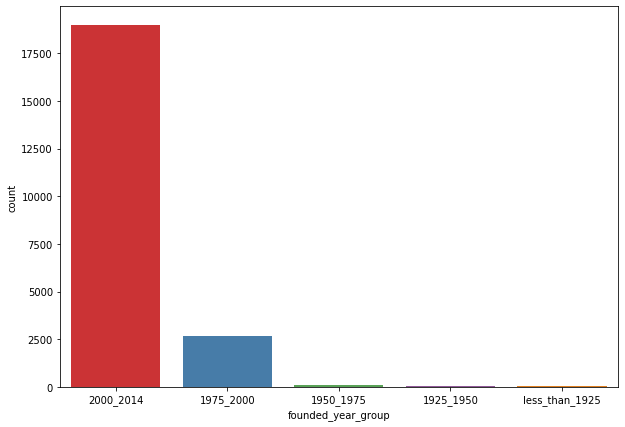

In [38]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'founded_year_group', data = df.dropna(), palette='Set1')
plt.show()

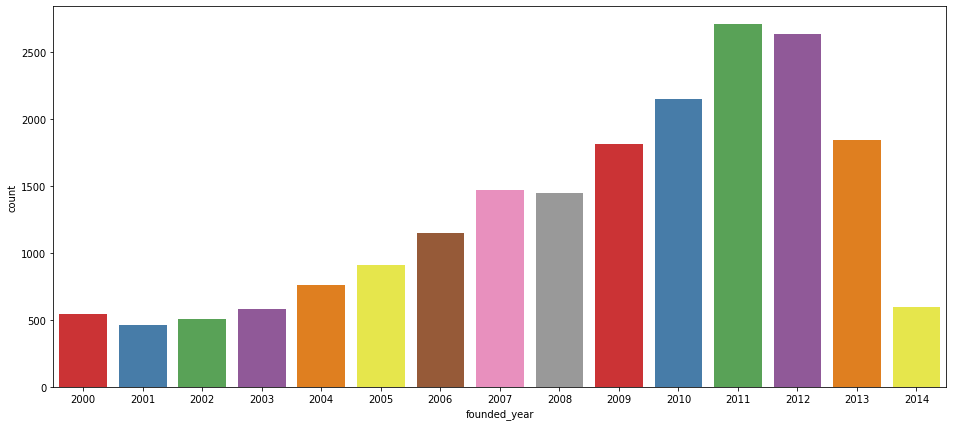

In [39]:
df_2000 = df[df['founded_year'] >= 2000]
df_2000['founded_year'] = df_2000['founded_year'].astype(int)
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year', data = df_2000, palette='Set1')
plt.show()

In [19]:
df_2000['country_code'].unique()

array(['USA', 'CAN'], dtype=object)

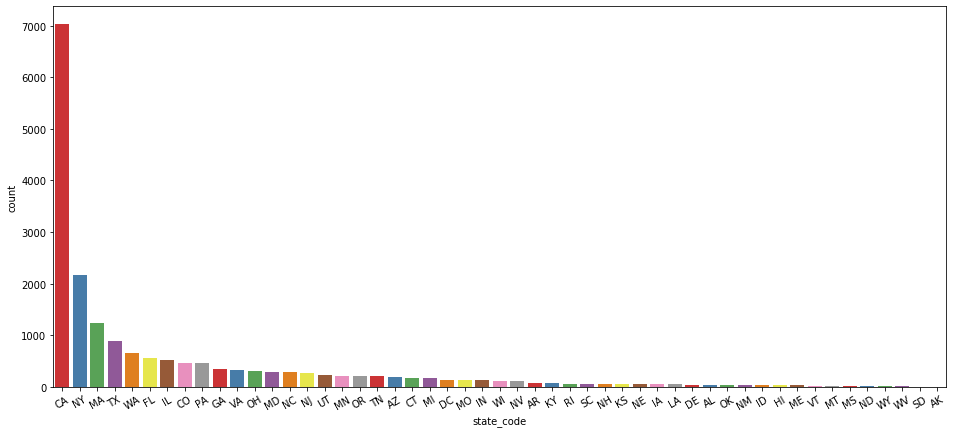

In [51]:
df_2000_USA = df_2000[(df_2000['country_code'] =='USA')]
plt.figure(figsize=(16,7))
g = sns.countplot(x ='state_code', data = df_2000_USA, order=df_2000_USA['state_code'].value_counts().iloc[:51].index, palette='Set1')
plt.xticks(rotation=30)
plt.show()

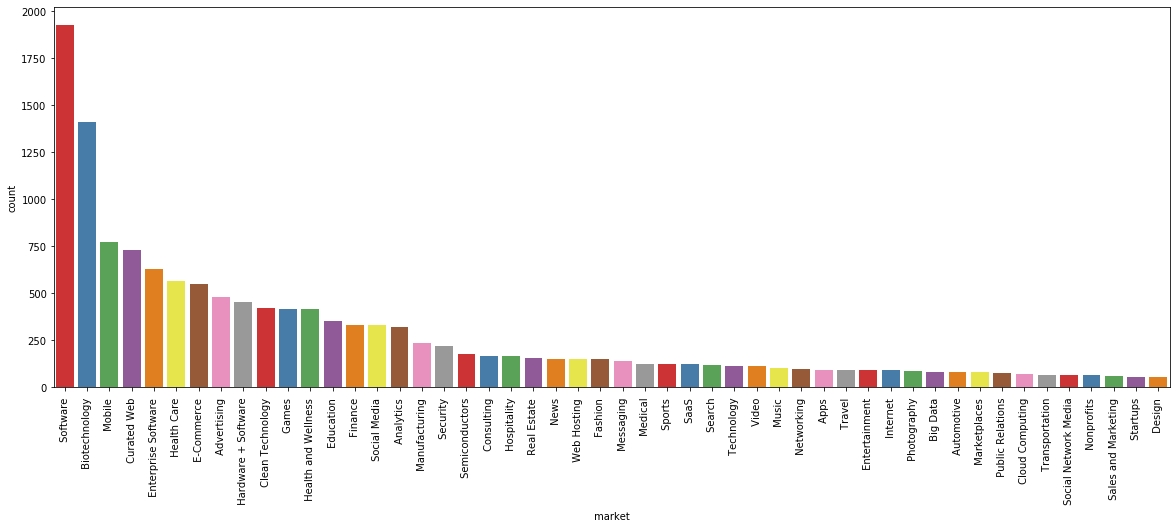

In [59]:
plt.figure(figsize=(20,7))
sns.countplot(x =' market ', data = df_2000_USA, order=df_2000_USA[' market '].value_counts().iloc[:50].index, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [79]:
by_market = (df_2000_USA
            .groupby(' market ')
            .filter(lambda x : len(x) > 250)
            .groupby([' market ', 'state_code'])
            .size()
            .unstack()
           )
by_market

state_code,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
market,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Advertising,NaN,NaN,NaN,7.0,192.0,17.0,7.0,3.0,1.0,11.0,6.0,NaN,NaN,1.0,9.0,3.0,NaN,3.0,NaN,27.0,6.0,NaN,1.0,3.0,2.0,NaN,NaN,6.0,NaN,2.0,1.0,3.0,NaN,1.0,110.0,5.0,NaN,3.0,7.0,1.0,NaN,NaN,4.0,13.0,6.0,6.0,1.0,10.0,1.0,NaN,NaN
Analytics,NaN,NaN,NaN,NaN,130.0,6.0,3.0,2.0,NaN,7.0,7.0,NaN,NaN,NaN,8.0,2.0,2.0,NaN,1.0,31.0,5.0,2.0,3.0,2.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,5.0,NaN,1.0,34.0,5.0,NaN,2.0,8.0,NaN,NaN,NaN,1.0,15.0,4.0,8.0,NaN,14.0,3.0,NaN,NaN
Biotechnology,NaN,9.0,4.0,14.0,383.0,36.0,33.0,3.0,2.0,51.0,21.0,4.0,6.0,1.0,18.0,20.0,3.0,14.0,4.0,166.0,46.0,4.0,36.0,31.0,17.0,NaN,1.0,43.0,1.0,2.0,7.0,28.0,7.0,6.0,62.0,24.0,5.0,14.0,81.0,8.0,10.0,NaN,21.0,61.0,20.0,22.0,NaN,35.0,21.0,2.0,1.0
Clean Technology,NaN,NaN,2.0,6.0,144.0,15.0,4.0,1.0,3.0,13.0,5.0,1.0,NaN,2.0,9.0,2.0,1.0,3.0,1.0,52.0,9.0,1.0,3.0,3.0,1.0,NaN,3.0,6.0,NaN,1.0,4.0,4.0,4.0,3.0,23.0,5.0,1.0,7.0,11.0,3.0,1.0,NaN,4.0,30.0,6.0,3.0,2.0,12.0,5.0,1.0,NaN
Curated Web,NaN,NaN,1.0,6.0,320.0,12.0,9.0,4.0,2.0,18.0,7.0,NaN,1.0,NaN,19.0,2.0,1.0,3.0,1.0,37.0,9.0,2.0,5.0,6.0,1.0,NaN,1.0,2.0,NaN,5.0,1.0,5.0,NaN,4.0,126.0,14.0,2.0,6.0,14.0,NaN,NaN,1.0,6.0,22.0,9.0,13.0,1.0,23.0,7.0,NaN,NaN
E-Commerce,NaN,1.0,3.0,4.0,194.0,9.0,4.0,3.0,4.0,23.0,14.0,1.0,1.0,1.0,19.0,3.0,1.0,1.0,NaN,20.0,10.0,2.0,4.0,5.0,2.0,NaN,NaN,6.0,1.0,2.0,1.0,5.0,NaN,4.0,108.0,7.0,1.0,9.0,13.0,3.0,1.0,1.0,4.0,20.0,8.0,7.0,1.0,13.0,4.0,NaN,NaN
Education,NaN,NaN,1.0,4.0,104.0,6.0,4.0,2.0,1.0,7.0,4.0,NaN,3.0,2.0,16.0,2.0,NaN,1.0,3.0,25.0,10.0,1.0,6.0,6.0,2.0,NaN,NaN,6.0,NaN,2.0,2.0,10.0,NaN,4.0,53.0,5.0,2.0,1.0,11.0,5.0,2.0,NaN,2.0,10.0,7.0,6.0,NaN,9.0,1.0,NaN,1.0
Enterprise Software,NaN,1.0,3.0,3.0,264.0,19.0,3.0,3.0,2.0,16.0,17.0,NaN,1.0,1.0,13.0,5.0,1.0,2.0,NaN,57.0,10.0,NaN,2.0,3.0,1.0,NaN,3.0,8.0,NaN,2.0,2.0,8.0,NaN,2.0,45.0,11.0,NaN,6.0,22.0,4.0,2.0,NaN,5.0,27.0,8.0,15.0,NaN,29.0,4.0,NaN,NaN
Finance,NaN,NaN,2.0,4.0,94.0,18.0,3.0,NaN,NaN,14.0,8.0,1.0,2.0,3.0,14.0,2.0,3.0,NaN,1.0,21.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN,3.0,NaN,2.0,NaN,6.0,NaN,6.0,58.0,4.0,NaN,5.0,6.0,1.0,NaN,NaN,2.0,11.0,8.0,2.0,3.0,13.0,2.0,NaN,1.0


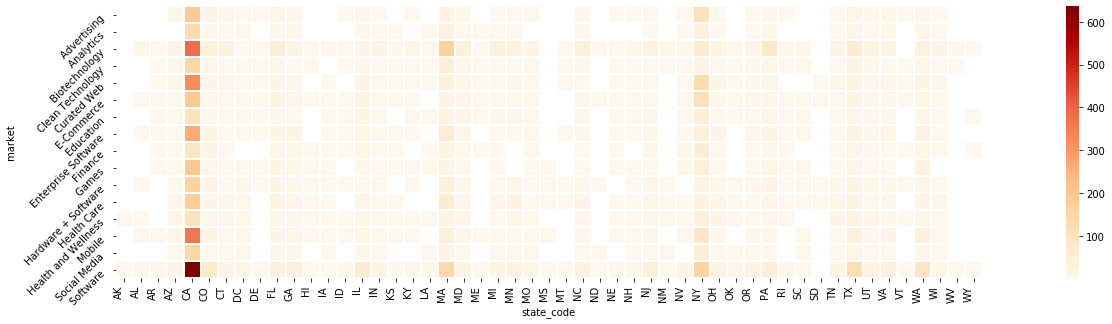

In [80]:
plt.figure(figsize=(30,5))
g = sns.heatmap(by_market, 
    square=True,
    cbar_kws={'fraction' : 0.15},
    cmap='OrRd',
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right');
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right');

In [22]:
df_2000_USA.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                    int64
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year              int64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [0]:
columns = [' market ', 'initial_funding', 'status', 'country_code',
           'state_code', 'city', 'funding_rounds', 'seed', 'venture',
           'equity_crowdfunding', 'private_equity', 'angel', 'product_crowdfunding']

df_2000_USA = df_2000_USA[columns]

In [24]:
df_2000_USA['state_code']

0        NY
8        IL
16       MD
17       OR
20       CA
         ..
49418    CA
49419    MD
49425    PA
49426    CA
49427    MD
Name: state_code, Length: 18686, dtype: object

In [25]:
df_2000_USA.dtypes

 market                  object
initial_funding         float64
status                    int64
country_code             object
state_code               object
city                     object
funding_rounds          float64
seed                    float64
venture                 float64
equity_crowdfunding     float64
private_equity          float64
angel                   float64
product_crowdfunding    float64
dtype: object

In [0]:
df_2000_USA = pd.concat([df_2000_USA,pd.get_dummies(df_2000_USA[' market '],drop_first=True,prefix=" market ")],axis=1)
df_2000_USA = pd.concat([df_2000_USA,pd.get_dummies(df_2000_USA['country_code'],drop_first=True,prefix="country_code")],axis=1)
df_2000_USA = pd.concat([df_2000_USA,pd.get_dummies(df_2000_USA['state_code'],drop_first=True,prefix="state_code")],axis=1)
df_2000_USA = pd.concat([df_2000_USA,pd.get_dummies(df_2000_USA['city'],drop_first=True,prefix="city")],axis=1)


In [0]:
#Drop the original Categorical Variables
df_2000_USA.drop([' market ','country_code','state_code','city'],axis=1,inplace=True)

In [0]:
#Create the train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_2000_USA.drop('status',axis=1), 
                                                    df_2000_USA['status'], test_size=0.30, 
                                                    random_state=101)

In [29]:
y_train.value_counts(normalize=True)

1    0.944648
0    0.055352
Name: status, dtype: float64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Train the model
# logmodel = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500,
#                                   min_samples_split = 2, min_samples_leaf = 1, class_weight='balanced')

logmodel = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=15, max_features='auto', max_leaf_nodes=None,
                                                         min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0,
                                                         n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
                                                         verbose=0, warm_start=False)
logmodel.fit(X_train,y_train)

#Predicting on the Test Set
predictions = logmodel.predict(X_test)

In [31]:
#Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test,predictions))

truePos = X_test[((predictions == 1) & (y_test == predictions))]
falsePos = X_test[((predictions == 1) & (y_test != predictions))]
trueNeg = X_test[((predictions == 0) & (y_test == predictions))]
falseNeg = X_test[((predictions == 0) & (y_test != predictions))]

TP = truePos.shape[0]
FP = falsePos.shape[0]
TN = trueNeg.shape[0]and 
FN = falseNeg.shape[0]

accuracy = float(TP + TN)/float(TP + TN + FP + FN)
print('Accuracy: '+str(accuracy))
print('ROC AUC SCORE',roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.11      0.53      0.18       358
           1       0.96      0.70      0.81      5248

    accuracy                           0.69      5606
   macro avg       0.53      0.61      0.49      5606
weighted avg       0.90      0.69      0.77      5606

Accuracy: 0.6851587584730646
ROC AUC SCORE 0.6145113009265568


In [0]:
import pickle

with open('logmodel.pkl', 'wb') as fid:
    pickle.dump(logmodel, fid,2)  

In [0]:
cat = df_2000_USA.drop('status',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  